# Joshua S Raju | 22BAI1213
## K-Means | Image Compression
****

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import cv2
import os

In [2]:
path = 'mona_lisa.jpg'

## Compression Functions

In [3]:
# READ THE IMAGE
def read_img(path):
    img = cv2.imread(path)
    # img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255.0
    img.reshape((-1, img.shape[2]))
    print(img.shape)
    # plt.imshow(img)
    # plt.show()
    return img

In [4]:
# INITIALIZE THE RANDOM CENTROIDS
def initialize_means(img, clusters):
    points = img.reshape((-1, img.shape[2]))
    m, n = points.shape
    means = np.zeros((clusters, n))

    for i in range(clusters):
        rand_indices = np.random.choice(m, size=10, replace = False)
        means[i] = np.mean(points[rand_indices], axis=0)

    return points, means

In [5]:
# EUCLIDEAN DISTANCE
def euclidean_dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [6]:
# APPLYING KMEANS
def k_means(points, means, clusters):
    iterations = 10
    m, n = points.shape
    index = np.zeros(m)

    while iterations > 0:
        for j in range(m):
            min_dist = float('inf')
            temp = None
            for k in range(clusters):
                x1, y1 = points[j, 0], points[j, 1]
                x2, y2 = means[k, 0], means[k, 1]

                if euclidean_dist(x1, y1, x2, y2) <= min_dist:
                    min_dist = euclidean_dist(x1, y1, x2, y2)
                    temp = k
                    index[j] = k

        for k in range(clusters):
            cluster_points = points[index == k]
            if len(cluster_points) > 0:
                means[k] = np.mean(cluster_points, axis=0)

        iterations -= 1

    return means, index

In [7]:
# COMPRESS IMG
def compress_img(means, index, img):
    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]
    recovered = recovered.reshape(img.shape)
    # recovered = np.clip(recovered, 0, 255).astype(np.uint8)
    
    plt.imsave('compressed_'+path, recovered)
    plt.imshow(recovered)
    plt.show()
    return recovered

## Driver Cell

(492, 330, 3)


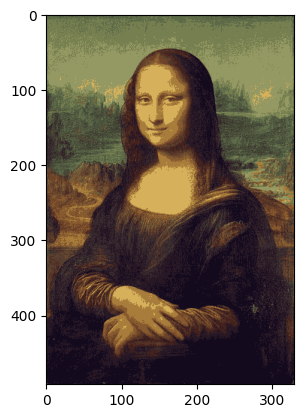

In [8]:
img = read_img('mona_lisa.jpg')
clusters = 16
points, means = initialize_means(img, clusters)
means, index = k_means(points, means, clusters)
img = compress_img(means, index, img)

## Comparing The Original and Compressed Images

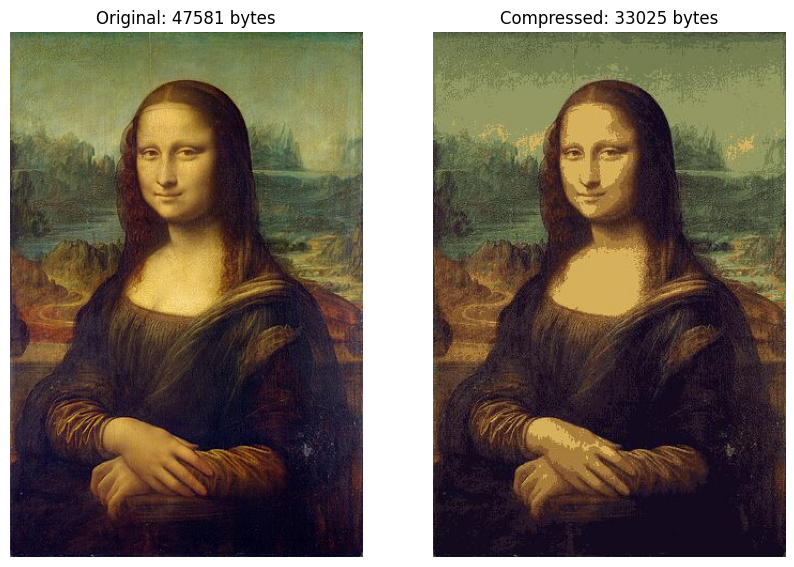

Compression Ratio:  1.44


In [9]:
comp_path = 'compressed_'+path
img = cv2.imread(path)

img_size = os.path.getsize(path)
comp_size = os.path.getsize(comp_path)

# img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Original: ' + str(img_size) + ' bytes')

ax[1].imshow(cv2.cvtColor(cv2.imread(comp_path), cv2.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('Compressed: '+ str(comp_size)+ ' bytes')

plt.show()
print('Compression Ratio: ', np.round(img_size/comp_size, 2))

## Silhouette Optimal Value

In [66]:
def get_optimal_k(data, k_min, k_max):
    max_silhouette_score = -1
    optimal_k = k_min
    for k in range(k_min, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        silhouette_score_val = silhouette_score(data, kmeans.labels_)
        if silhouette_score_val > max_silhouette_score:
            max_silhouette_score = silhouette_score_val
            optimal_k = k
    return optimal_k

In [69]:
def plot_silhouette_scores(data, k_min, k_max):
  silhouette_vals = []
  for k in range(k_min, k_max + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    silhouette_score_val = silhouette_score(data, kmeans.labels_)
    silhouette_vals.append(silhouette_score_val)
  
#   plt.figure(figsize=(8, 6))
#   plt.plot(range(k_min, k_max + 1), silhouette_vals, marker='o', label='Silhouette Coefficient')
#   plt.xlabel('Number of Clusters (k)')
#   plt.ylabel('Silhouette Score')
#   plt.title('Silhouette Analysis for K-Means Clustering')
#   plt.legend()
#   plt.show()

# plot_silhouette_scores(X, 2, 64) 

kmeans = KMeans(n_clusters=4, random_state=0)  # Replace 4 with your chosen k
kmeans.fit(X)

# Print silhouette coefficient for the chosen k
silhouette_score_final = silhouette_score(X, kmeans.labels_)
print("Silhouette Coefficient for k=4:", silhouette_score_final)

Silhouette Coefficient for k=4: 0.2810899855812063


C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [70]:
optimal_k = get_optimal_k(X, 2, 64)
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X)

silhouette_score_final = silhouette_score(X, kmeans.labels_)
print("Silhouette Coefficient for k={}: {}".format(optimal_k, silhouette_score_final))

C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

Silhouette Coefficient for k=31: 0.6015695347210785


C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\joshu\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Compressing Image Using Optimal K Value

(492, 330, 3)


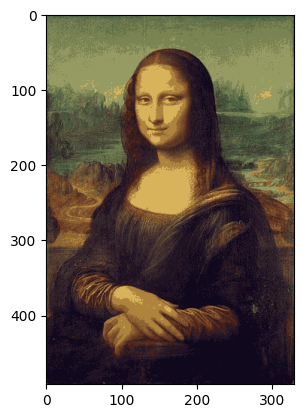

In [17]:
img = read_img('mona_lisa.jpg')
clusters = 31
points, means = initialize_means(img, clusters)
means, index = k_means(points, means, clusters)
img = compress_img(means, index, img)

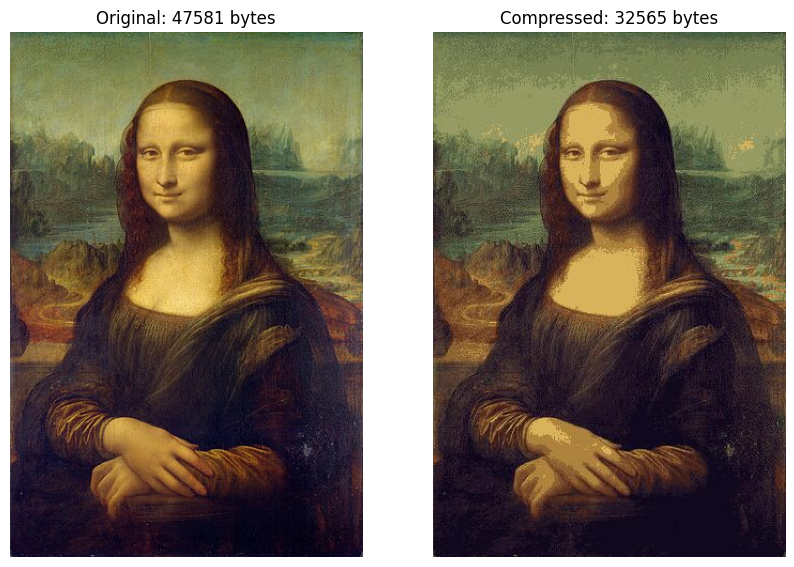

Compression Ratio:  1.46


In [18]:
comp_path = 'compressed_'+path
img = cv2.imread(path)

img_size = os.path.getsize(path)
comp_size = os.path.getsize(comp_path)

# img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Original: ' + str(img_size) + ' bytes')

ax[1].imshow(cv2.cvtColor(cv2.imread(comp_path), cv2.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('Compressed: '+ str(comp_size)+ ' bytes')

plt.show()
print('Compression Ratio: ', np.round(img_size/comp_size, 2))